## Two simple examples of KMeans clustering, how to chose cluster

>1. We will work on the `country` dataset
>2. We will also work on `market segmentation`

### To standardise of not?

### Market segmentation Example

In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

sn.set_style("whitegrid")

In [2]:
# load the dataset
dataset = pd.read_csv("3.12. Example.csv")


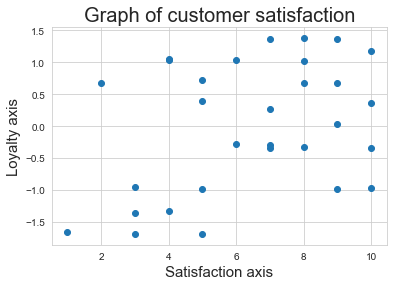

In [3]:
# plot the scatter plot for the dataset

plt.scatter(dataset["Satisfaction"], dataset["Loyalty"])
plt.xlabel("Satisfaction axis", size = 15)
plt.ylabel("Loyalty axis", size = 15)
plt.title("Graph of customer satisfaction", size = 20)
plt.show();

In [4]:
# copyin the data in a new variable X

X = dataset.copy()


In [5]:
# perfor clustring on the feature using the KMeans of 2

from sklearn.cluster import KMeans

kmeans = KMeans(2)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# adding the cluster result

cluster = X.copy()
cluster["cluster_pred"] = kmeans.fit_predict(X)

In [7]:
cluster

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,1
5,1,-1.66,3
6,10,-0.97,0
7,8,-0.32,2
8,8,1.02,2
9,8,0.68,2


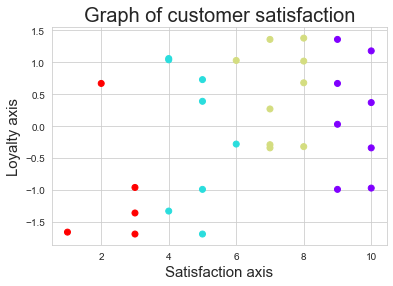

In [8]:
# ploting the clusters

plt.scatter(cluster["Satisfaction"], cluster["Loyalty"], c = cluster["cluster_pred"], cmap = "rainbow")
plt.xlabel("Satisfaction axis", size = 15)
plt.ylabel("Loyalty axis", size = 15)
plt.title("Graph of customer satisfaction", size = 20)
plt.show();

In [9]:
# to scale satisfaction alone
# scale is a method which scale each variable seperately
# this method only standardise the "Satisfaction" because the other column is already standardised

from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

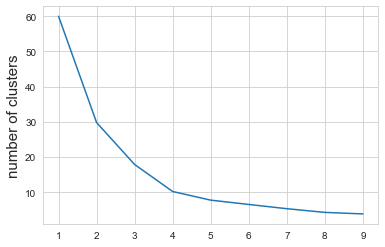

In [10]:
# taking advantage of the elbow method

wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
n_cluster = range(1,10)

plt.plot(n_cluster, wcss)
plt.ylabel("WCSS", size = 15)
plt.ylabel("number of clusters", size = 15)
plt.show();

In [11]:
# exploring the data with the new solution

kmeans = KMeans(4)
kmeans.fit(X_scaled)
new_clusters = kmeans.predict(X_scaled)

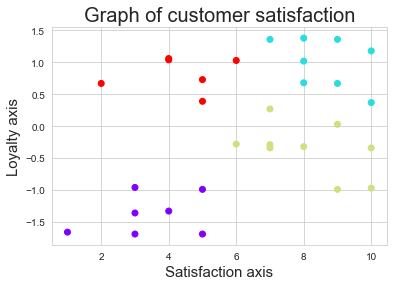

In [13]:
# we will make use of the old data but use the clustring from the new scaled data
# it very much import to use the cluster from the standadised solution

plt.scatter(cluster["Satisfaction"], cluster["Loyalty"], c = new_clusters, cmap = "rainbow")
plt.xlabel("Satisfaction axis", size = 15)
plt.ylabel("Loyalty axis", size = 15)
plt.title("Graph of customer satisfaction", size = 20)
plt.show();

In [15]:
dataset = pd.read_csv("14.1 iris_dataset.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
dataset.shape

(150, 4)

In [17]:
iris = dataset.copy()

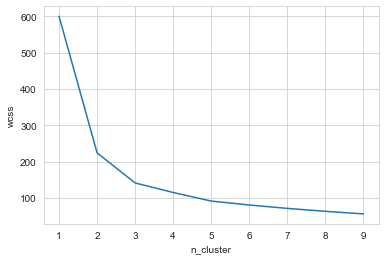

In [19]:
# making use of the elbow method to find the best number of clusters
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_iris = sc.fit_transform(iris)

wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_iris)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
n_cluster = range(1,10)
plt.plot(n_cluster, wcss)
plt.ylabel("wcss")
plt.xlabel("n_cluster");

In [21]:
iris["clusters"] = KMeans(3).fit_predict(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [23]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,clusters
56,6.3,3.3,4.7,1.6,2
13,4.3,3.0,1.1,0.1,1
96,5.7,2.9,4.2,1.3,2
62,6.0,2.2,4.0,1.0,2
53,5.5,2.3,4.0,1.3,2
85,6.0,3.4,4.5,1.6,2
47,4.6,3.2,1.4,0.2,1
132,6.4,2.8,5.6,2.2,0
79,5.7,2.6,3.5,1.0,2
25,5.0,3.0,1.6,0.2,1
